In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [101]:
data = pd.read_csv('data/fewmissing.csv', sep = ';')

In [102]:
data.sample(5)

,Fuma,Aposentado,Desempregado,Licenca_Medica,Aposentado_Invalidez,Alg.e9.sicos,OutraDoenca,Dor_costas,Dor_pers,Retorr_trabalho,...,SF12_M1_3_v1,SF12_M1_4_v1,SF12_M1_5_v1,SF12_M1_6_v1,SF12_M1_7_v1,SF12_M1_8_v1,SF12_M1_9_v1,SF12_M1_10_v1,SF12_M1_11_v1,SF12_M1_12_v1
48,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,3,5,5,5,5,1,5,5,5,5
20,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,5,5,5,5,1,5,5,5,5
108,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,5,5,5,5,1,5,5,5,5
51,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,5,5,5,5,1,5,5,5,5
38,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,2,3,3,4,4,3,3,3,3,3


### Imputar mediana para valores faltantes

In [103]:
from sklearn.impute import SimpleImputer

In [104]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [105]:
imp.fit(data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [106]:
data_nonan = pd.DataFrame(imp.transform(data), columns = list(data))

In [107]:
data_nonan.isnull().sum().sum()

0

In [108]:
data_bin = data_nonan.iloc[:,np.r_[0:97]]
data_ord = data_nonan.iloc[:,np.r_[98:data_nonan.shape[1]]]

### Normalização dos ordinais

In [109]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [110]:
ss.fit(data_ord)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [111]:
data_ord_ss = pd.DataFrame(ss.transform(data_ord), columns = list(data_ord))

In [112]:
data_pca = pd.concat([data_bin,data_ord_ss], axis = 1)

In [113]:
data_pca

,Fuma,Aposentado,Desempregado,Licenca_Medica,Aposentado_Invalidez,Alg.e9.sicos,OutraDoenca,Dor_costas,Dor_pers,Retorr_trabalho,...,SF12_M1_3_v1,SF12_M1_4_v1,SF12_M1_5_v1,SF12_M1_6_v1,SF12_M1_7_v1,SF12_M1_8_v1,SF12_M1_9_v1,SF12_M1_10_v1,SF12_M1_11_v1,SF12_M1_12_v1
0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.762787,-1.598078,-1.798941,-2.030623,-2.027363,1.851836,-1.708677,-0.765169,-1.835898,-1.913475
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,-1.762787,-1.598078,-1.798941,-2.030623,-2.027363,1.851836,-1.708677,-1.710883,-1.835898,-1.913475
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.109903,1.203334,1.176751,0.998103,0.976138,-1.086173,1.082726,1.126259,1.076825,1.023487
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,-1.762787,-1.598078,-1.798941,-1.273442,-2.027363,0.872500,-1.708677,-0.765169,-0.864990,-0.934488
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,-1.762787,-1.598078,-1.798941,-2.030623,-2.027363,1.851836,-0.778209,-0.765169,-1.835898,-1.913475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.326442,-0.897725,-0.311095,-0.516260,-0.525613,-0.106837,0.152258,0.180545,0.105917,0.044499
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.326442,-0.897725,-0.311095,-0.516260,-0.525613,-0.106837,0.152258,0.180545,0.105917,0.044499
107,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,-0.326442,-0.897725,-0.311095,-0.516260,-0.525613,-0.106837,0.152258,0.180545,0.105917,0.044499
108,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.109903,1.203334,1.176751,0.998103,0.976138,-1.086173,1.082726,1.126259,1.076825,1.023487


### PCA

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=10)

In [119]:
pca.fit(data_pca)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [120]:
pca.explained_variance_ratio_

array([0.47738745, 0.11520205, 0.04772711, 0.03878335, 0.03195605,
       0.03113927, 0.025614  , 0.0202692 , 0.01704816, 0.01420279])

In [121]:
pca2 = PCA(n_components = 2)

In [122]:
pca2.fit(data_pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [123]:
components = pca2.fit_transform(data_pca)

In [124]:
components

array([[ 7.61124077, -0.7241188 ],
       [12.02725557,  2.49783535],
       [-3.73131053, -2.32614488],
       [ 5.70033086,  0.5995025 ],
       [ 7.34816542,  0.48710731],
       [ 2.61249298,  0.56236037],
       [ 7.50069381, -0.5368796 ],
       [-5.2818167 ,  3.15577142],
       [ 1.31309129, -0.70876469],
       [-4.68302333, -0.93138375],
       [ 0.9265642 , -1.63931232],
       [-4.44279837,  3.79385002],
       [ 0.48885238,  0.08788803],
       [ 1.02108817, -1.21831359],
       [-3.48365769,  1.09250914],
       [ 0.1533621 , -0.10484273],
       [ 0.56522805, -2.657113  ],
       [-4.16174907,  2.88184893],
       [-0.88480591, -0.4349827 ],
       [ 1.81499632, -3.12045146],
       [-4.90327333,  3.48030827],
       [ 0.5076559 , -2.15351139],
       [ 0.78545015, -1.67138216],
       [ 1.51445877, -0.79099276],
       [-5.24721029,  3.14646524],
       [ 2.68464342, -3.17813092],
       [-3.58964615, -0.95404836],
       [-3.63576866, -0.79178123],
       [ 1.23120817,

In [125]:
df_pca = pd.DataFrame(data = components, columns = ['PC1','PC2'])

### Plot components

In [126]:
from plotnine import *

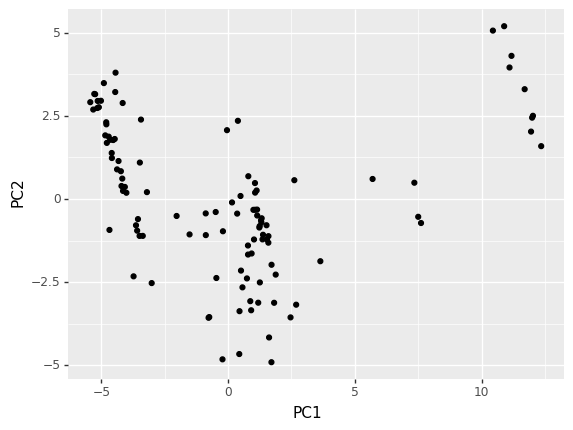

<ggplot: (-9223371957015111772)>

In [127]:
(ggplot(df_pca) + 
 aes(x = 'PC1', y= 'PC2') + 
 geom_point())

# ML

### Random Forest

In [128]:
df = data_pca

In [132]:
X = df['D30']
y = df.drop('D30', axis = 1)

In [133]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_)